# Beton Basınç Dayanımı Regresyonu

Aşağıdaki yaklaşımı izleyeceğiz:

1. Problem tanımı
2. Veri
3. Değerlendirme
4. Özellikler
5. Modelleme
6. Model Değerlendirmesi
7. Deneyler / İyileştirmeler

# 1. Problem Tanımı

Verilen parametreleri kullanarak çeşitli Python tabanlı Makine Öğrenmesi modelleri ile beton basınç dayanımını nasıl tahmin edebiliriz?

# 2. Veri

Veri Kaynağı: https://www.kaggle.com/vinayakshanawad/cement-manufacturing-concrete-dataset

## Veri Açıklaması

Belirli bir yaş (gün) altında verilen bir karışım için gerçek beton basınç dayanımı (MPa) laboratuvarda belirlenmiştir. Veriler ham formdadır (ölçeklenmemiş). Veri seti 8 nicel girdi değişkeni, 1 nicel çıktı değişkeni ve 1030 örnek (gözlem) içermektedir.

## Alan

Çimento üretimi

## Bağlam

Beton, inşaat mühendisliğinde en önemli malzemedir. Beton basınç dayanımı, yaş ve bileşenlerin yüksek derecede doğrusal olmayan bir fonksiyonudur. Bu bileşenler çimento, yüksek fırın cürufu, uçucu kül, su, süperplastikleştirici, iri agrega ve ince agrega içerir.

# 3. Değerlendirme

Bu bir Regresyon problemi olduğu için, modeli değerlendirmek için Ortalama Karekök Hatası (Root Mean Square Error) kullanacağız

# 4. Özellikler

## Girdiler / Özellikler


    Çimento (Cement) : m3 karışımda kg cinsinden ölçülmüştür
    Cüruf (Blast) : m3 karışımda kg cinsinden ölçülmüştür
    Uçucu Kül (Fly ash) : m3 karışımda kg cinsinden ölçülmüştür
    Su (Water) : m3 karışımda kg cinsinden ölçülmüştür
    Süperplastikleştirici (Superplasticizer) : m3 karışımda kg cinsinden ölçülmüştür
    İri Agrega (Coarse Aggregate) : m3 karışımda kg cinsinden ölçülmüştür
    İnce Agrega (Fine Aggregate) : m3 karışımda kg cinsinden ölçülmüştür
    Yaş (Age) : gün (1~365)
    
## Çıktı / Etiket
    Beton basınç dayanımı MPa cinsinden ölçülmüştür


## Standart İçe Aktarmalar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Veri setini okuma

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
# Yerel
# df = pd.read_csv('concrete.csv')

# Kaggle
df = pd.read_csv('/kaggle/input/cement-manufacturing-concrete-dataset/concrete.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/cement-manufacturing-concrete-dataset/concrete.csv'

## Veri Keşfi

In [ ]:
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

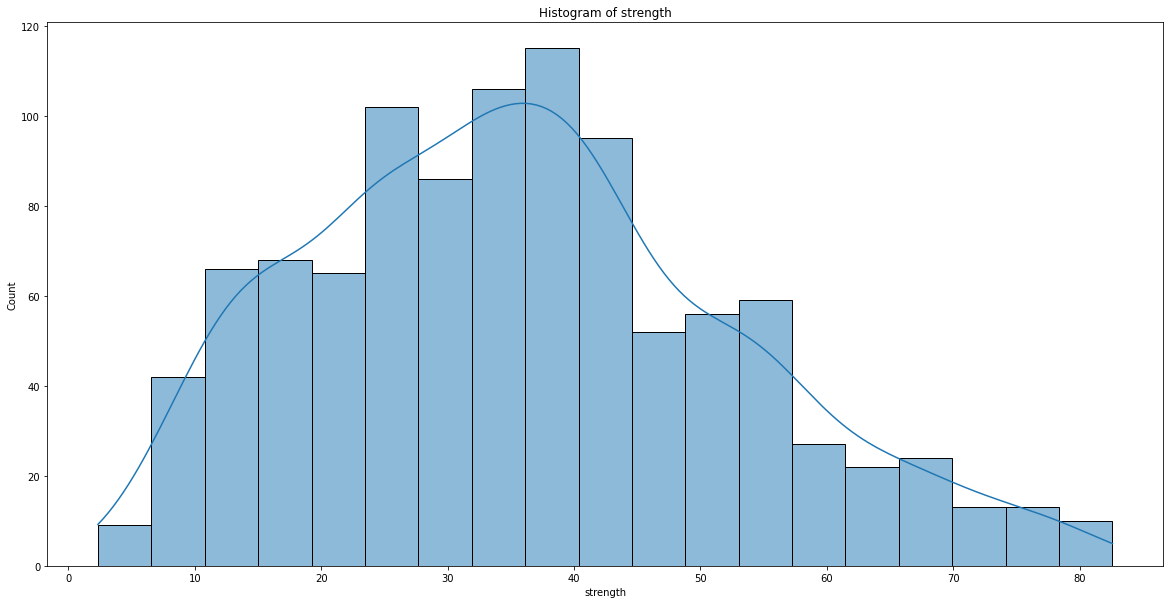

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Dayanım Histogramı')
sns.histplot(data=df,x='strength', kde=True);

histogram, veri setindeki dayanımın normal bir dağılıma sahip olduğunu göstermektedir

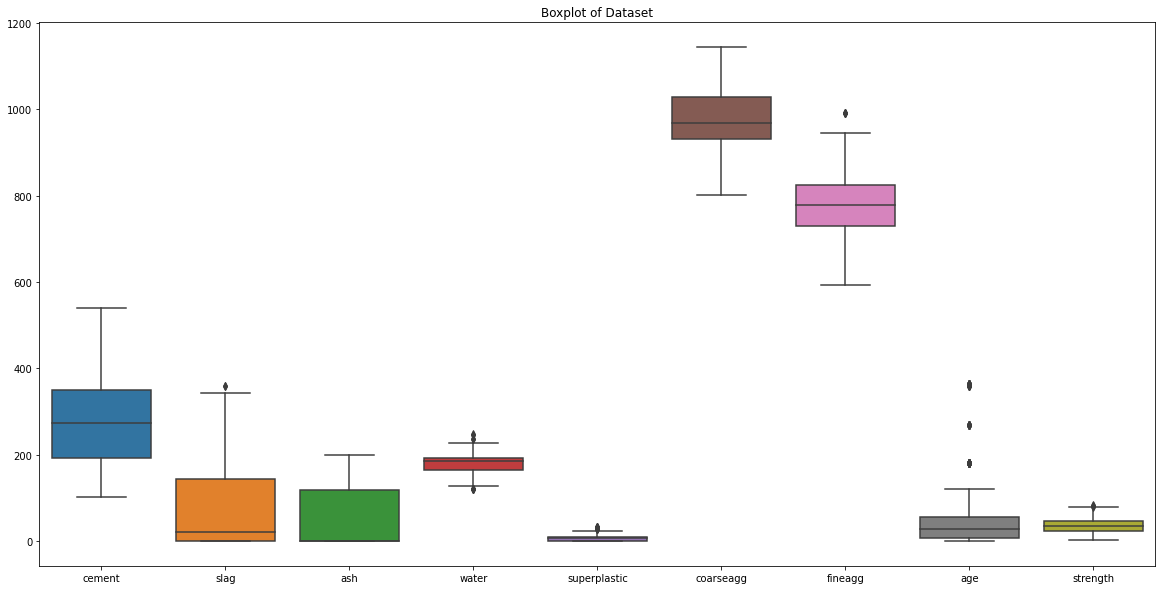

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Veri Seti Kutu Grafiği')
sns.boxplot(data=df);

Gördüğümüz gibi, veri setinde bazı aykırı değerler bulunmaktadır

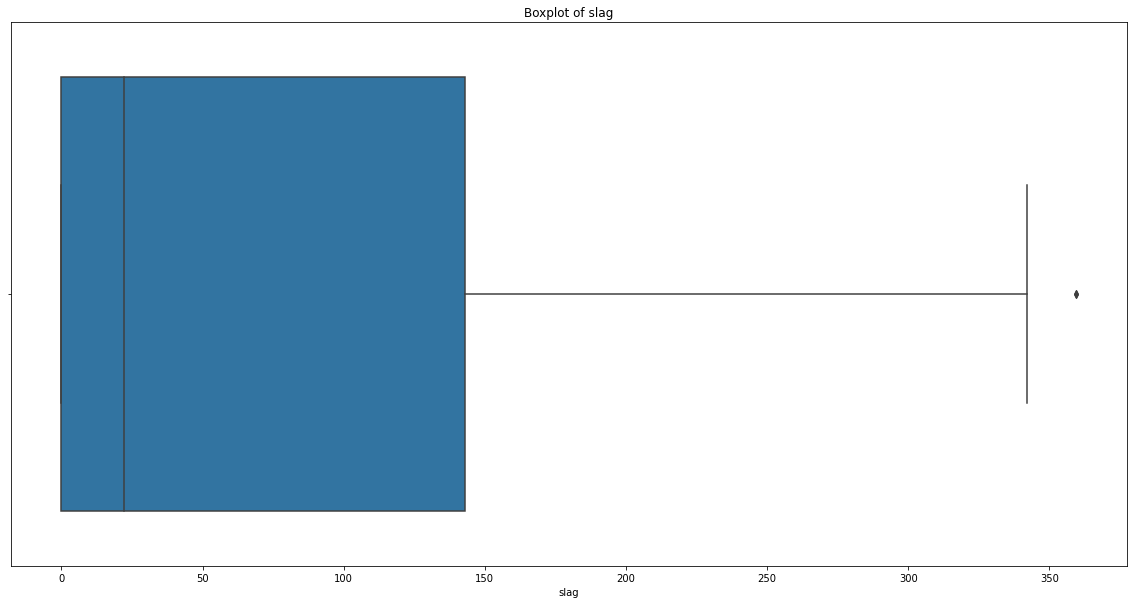

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Cüruf Kutu Grafiği')
sns.boxplot(data=df, x='slag');

In [ ]:
df[df['slag'] > 350]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


In [ ]:
df = df.drop(df[df['slag'] > 350].index)

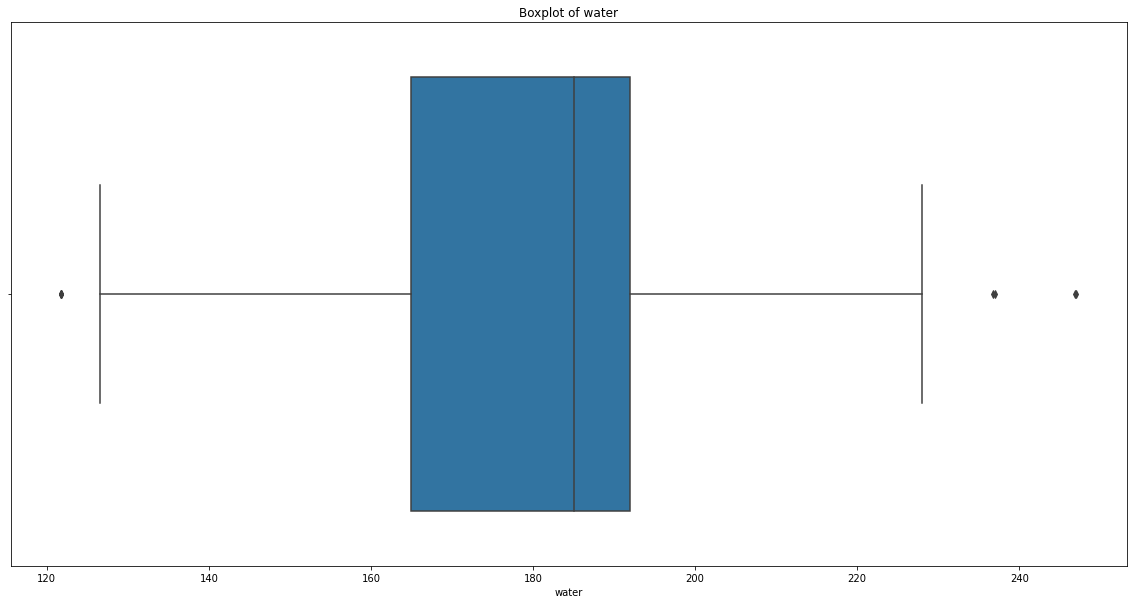

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Su Kutu Grafiği')
sns.boxplot(data=df, x='water');

In [ ]:
df[(df['water'] < 122) | (df['water'] > 230)] 

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


In [ ]:
df['water'].describe()

count    1028.000000
mean      181.559241
std        21.374222
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: water, dtype: float64

In [ ]:
df = df.drop(df[(df['water'] < 122) | (df['water'] > 230)].index)

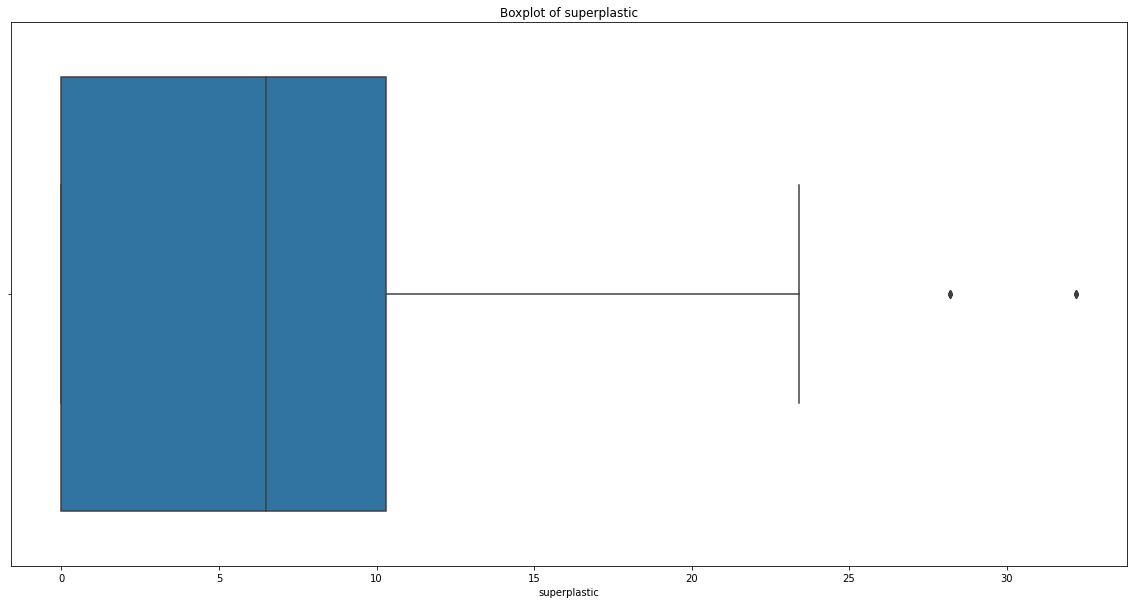

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Süperplastikleştirici Kutu Grafiği')
sns.boxplot(data=df, x='superplastic');

In [ ]:
df['superplastic'].describe()

count    1019.000000
mean        6.220314
std         5.999582
min         0.000000
25%         0.000000
50%         6.500000
75%        10.300000
max        32.200000
Name: superplastic, dtype: float64

In [ ]:
df[df['superplastic'] > 25]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


In [ ]:
df = df.drop(df[df['superplastic'] > 25].index)

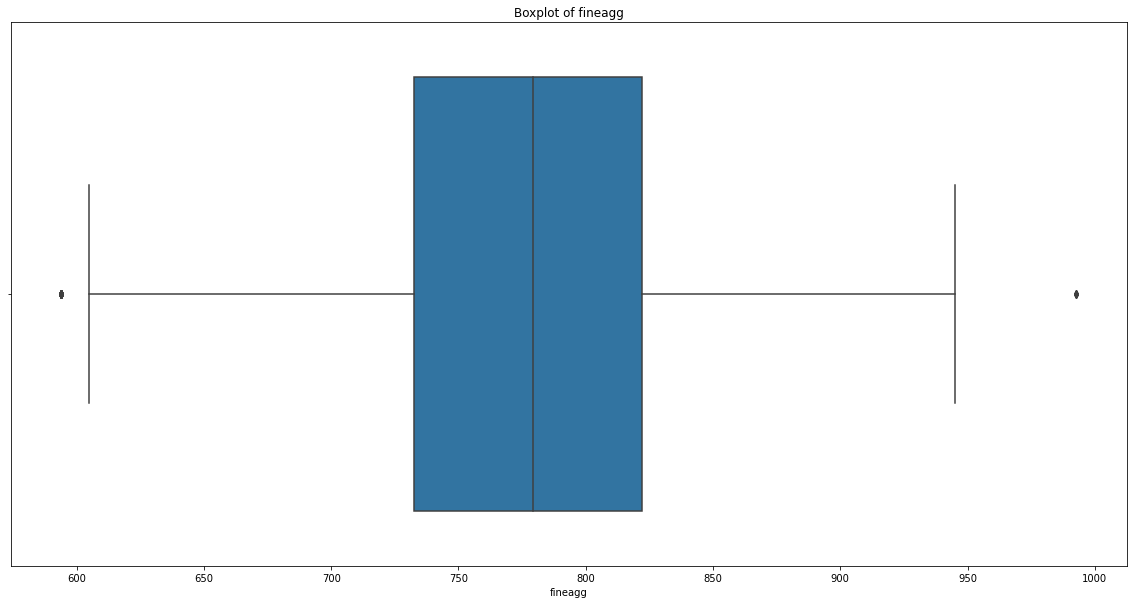

In [ ]:
plt.figure(figsize=(20,10))
plt.title('İnce Agrega Kutu Grafiği')
sns.boxplot(data=df, x='fineagg');

In [ ]:
df[(df['fineagg'] < 600) | (df['fineagg'] > 950)]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
13,237.5,237.5,0.0,228.0,0.0,932.0,594.0,7,26.26
16,237.5,237.5,0.0,228.0,0.0,932.0,594.0,28,30.08
31,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.50
142,332.5,142.5,0.0,228.0,0.0,932.0,594.0,90,37.72
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
241,427.5,47.5,0.0,228.0,0.0,932.0,594.0,90,41.54


In [ ]:
df = df.drop(df[(df['fineagg'] < 600) | (df['fineagg'] > 950)].index)

In [ ]:
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1024,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,3,21.91
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


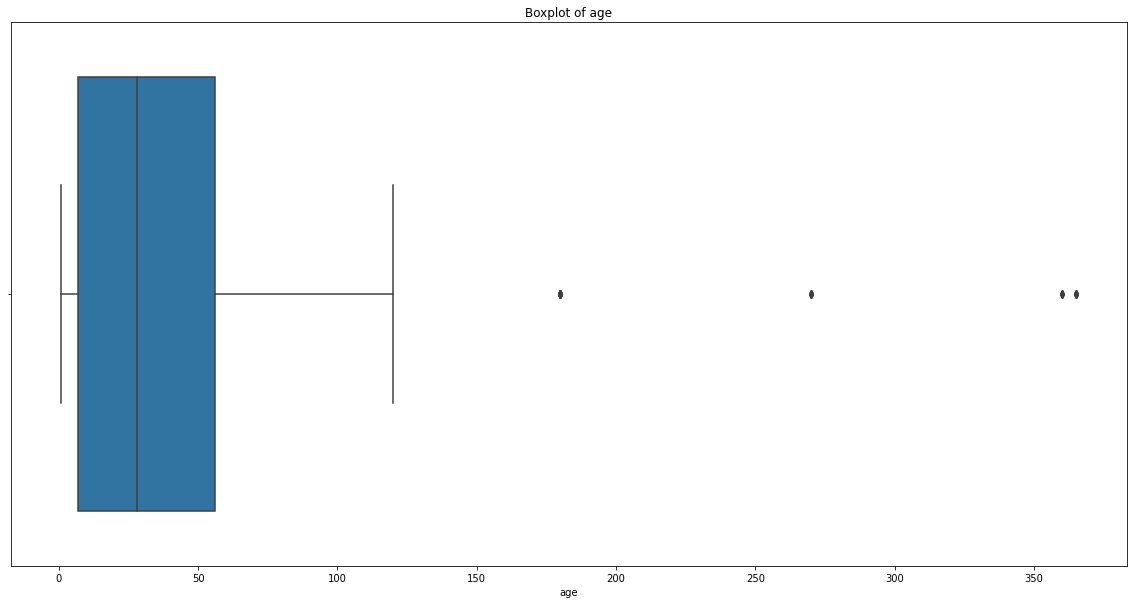

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Yaş Kutu Grafiği')
sns.boxplot(data=df, x='age');

In [ ]:
df[df['age'] > 150]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
159,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,55.26
198,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365,52.91
199,277.0,0.0,0.0,191.0,0.0,968.0,856.0,180,32.33
207,190.0,190.0,0.0,228.0,0.0,932.0,670.0,180,46.93


In [ ]:
df = df.drop(df[df['age'] > 150].index)

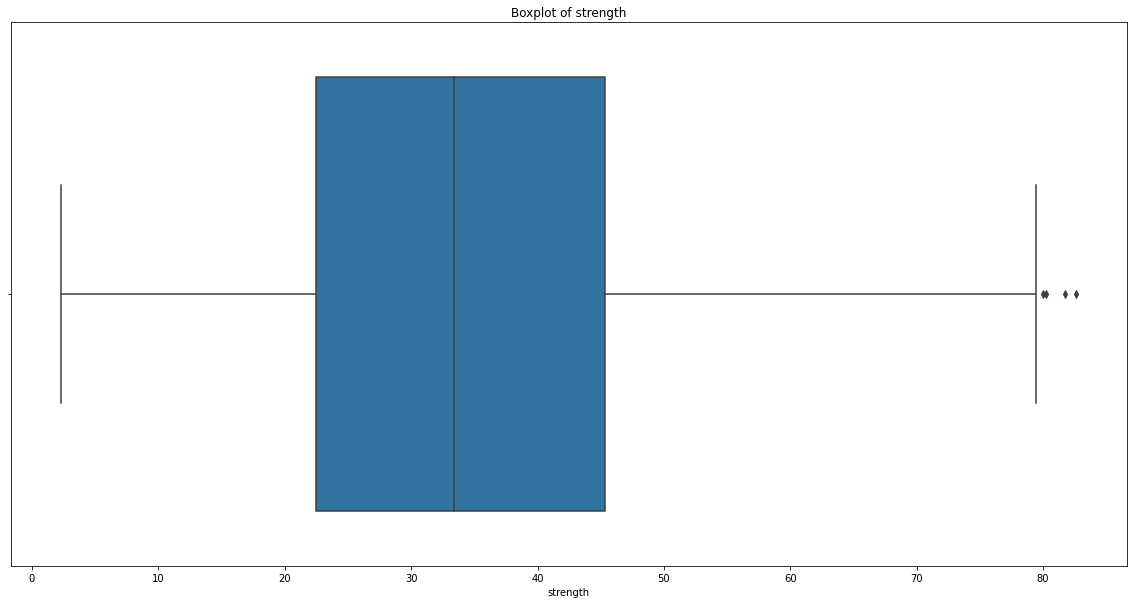

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Dayanım Kutu Grafiği')
sns.boxplot(data=df, x='strength');

In [ ]:
df['strength'].describe()

count    930.000000
mean      35.074548
std       16.953394
min        2.330000
25%       22.492500
50%       33.400000
75%       45.352500
max       82.600000
Name: strength, dtype: float64

In [ ]:
df[df['strength'] > 79]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
192,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75
245,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
257,389.9,189.0,0.0,145.9,22.0,944.7,755.8,56,79.40
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
733,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
766,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
1003,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20


In [ ]:
df = df.drop(df[df['strength'] > 79].index)

In [ ]:
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1023,141.3,212.0,0.0,203.5,0.0,971.8,748.5,7,10.39
1024,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,3,21.91
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28


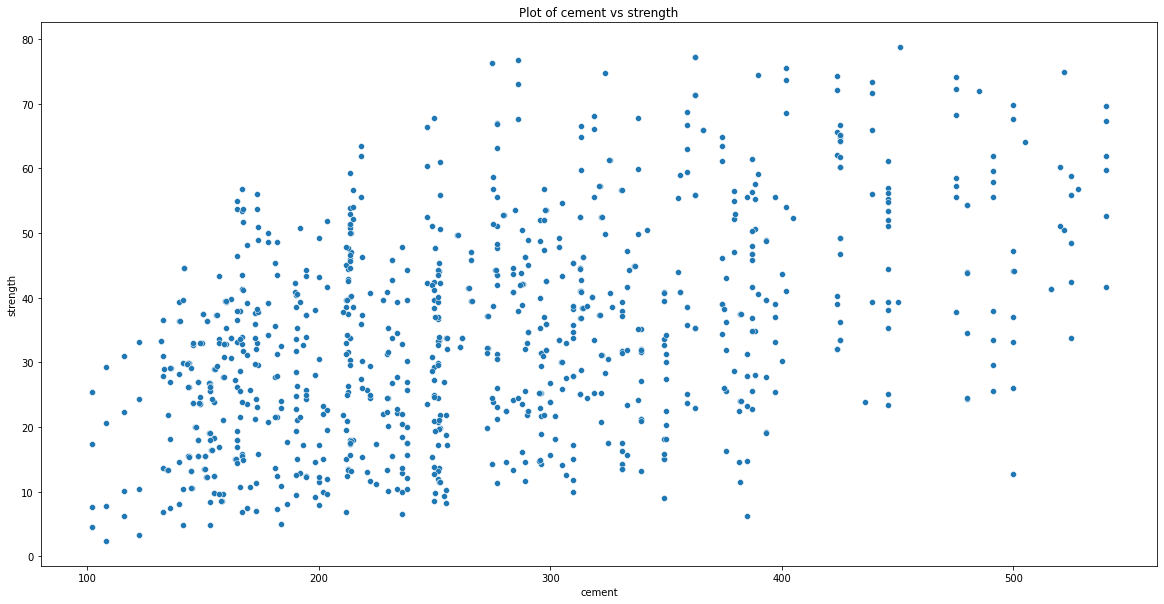

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Çimento - Dayanım Grafiği')
sns.scatterplot(data=df, x='cement', y= 'strength');

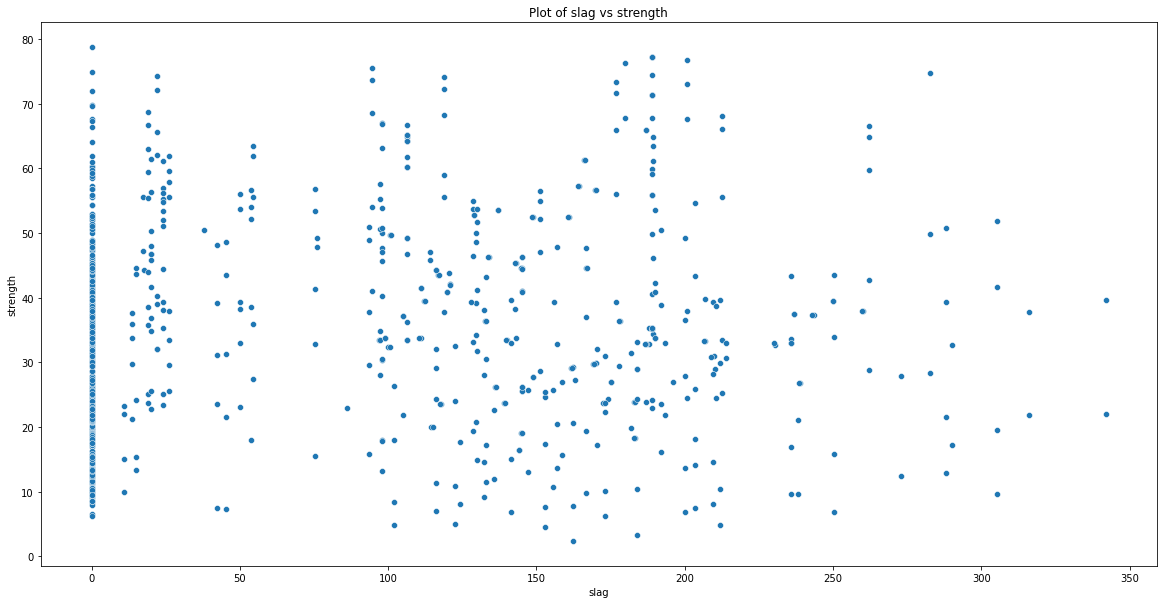

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Cüruf - Dayanım Grafiği')
sns.scatterplot(data=df, x='slag', y= 'strength');

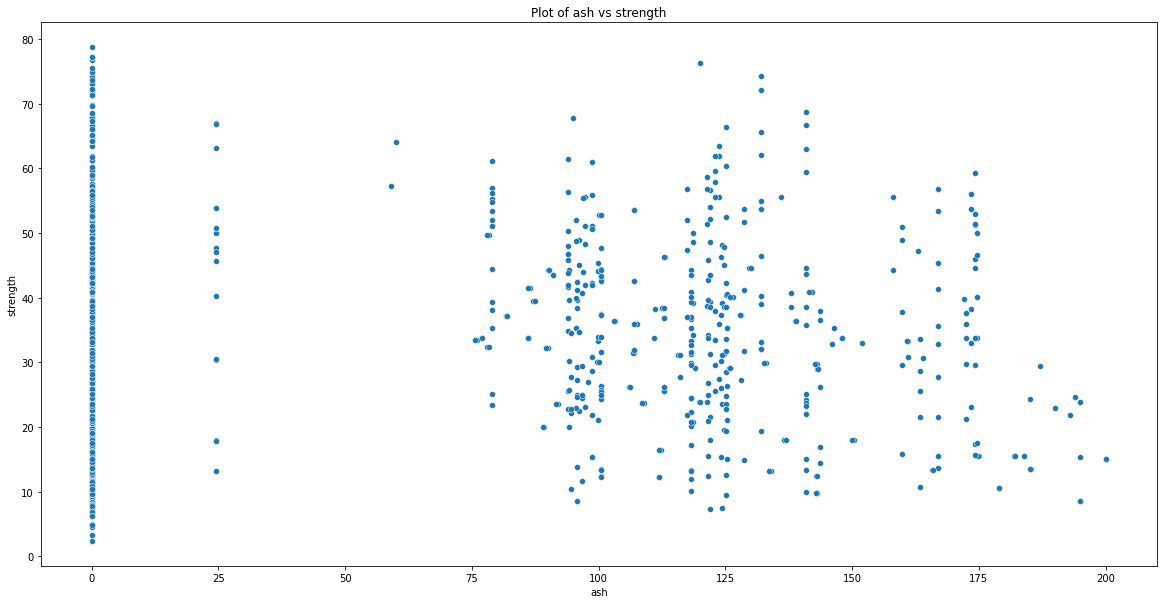

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Kül - Dayanım Grafiği')
sns.scatterplot(data=df, x='ash', y= 'strength');

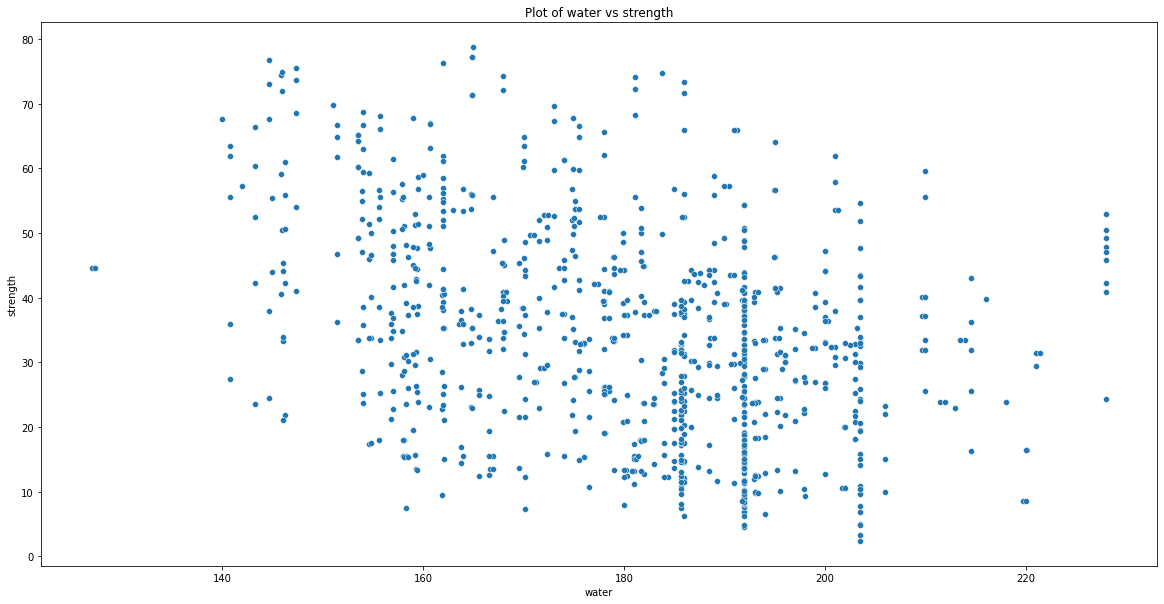

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Su - Dayanım Grafiği')
sns.scatterplot(data=df, x='water', y= 'strength');

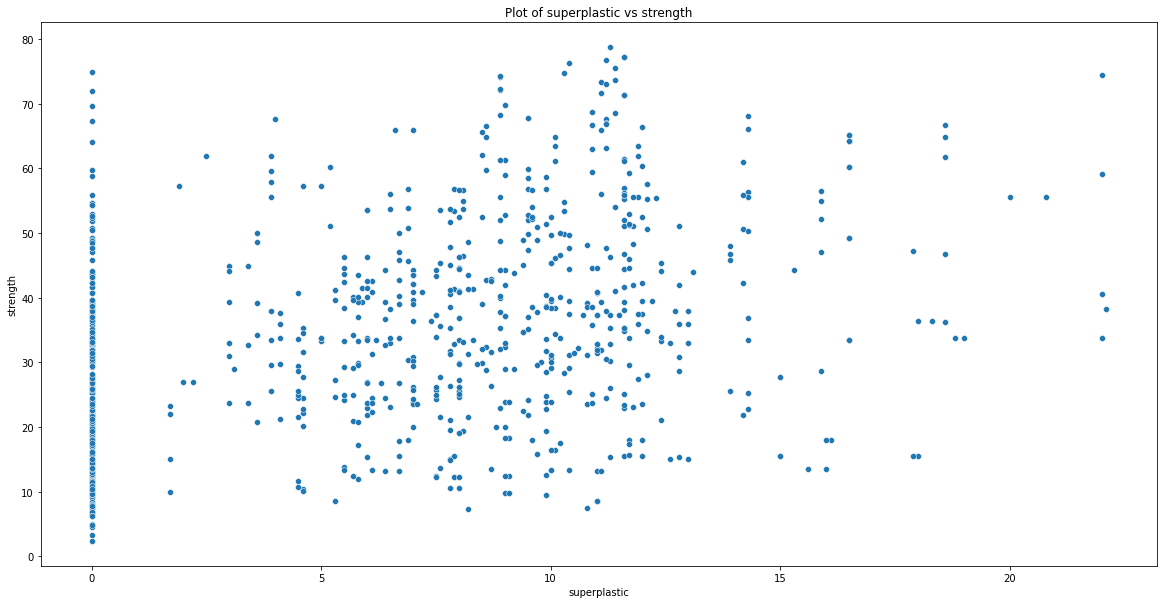

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Süperplastikleştirici - Dayanım Grafiği')
sns.scatterplot(data=df, x='superplastic', y= 'strength');

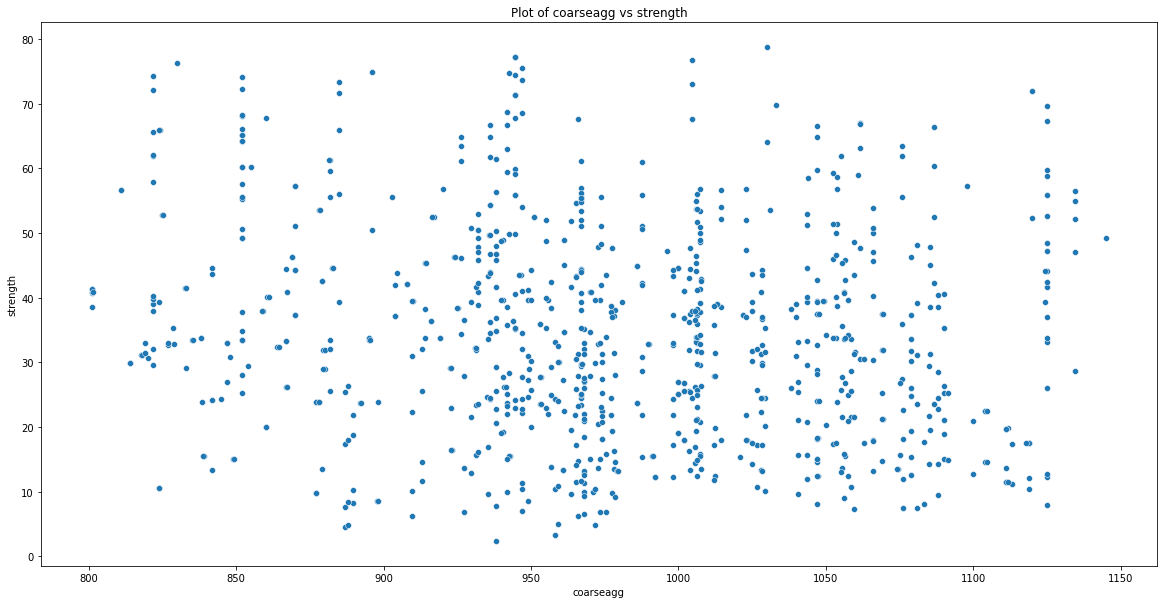

In [ ]:
plt.figure(figsize=(20,10))
plt.title('İri Agrega - Dayanım Grafiği')
sns.scatterplot(data=df, x='coarseagg', y= 'strength');

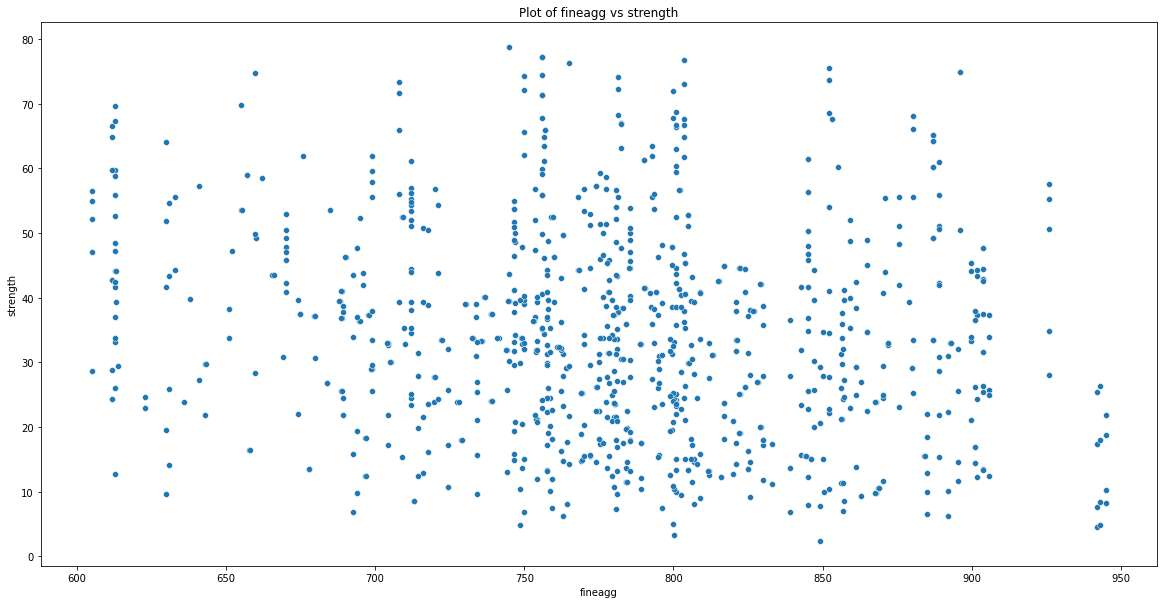

In [ ]:
plt.figure(figsize=(20,10))
plt.title('İnce Agrega - Dayanım Grafiği')
sns.scatterplot(data=df, x='fineagg', y= 'strength');

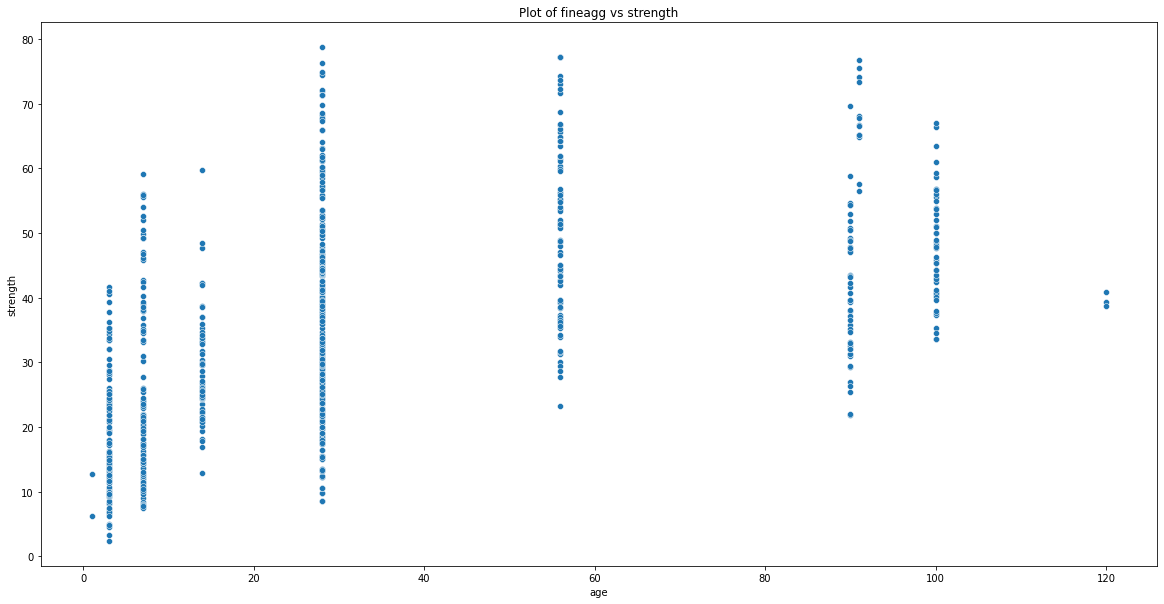

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Yaş - Dayanım Grafiği')
sns.scatterplot(data=df, x='age', y= 'strength');

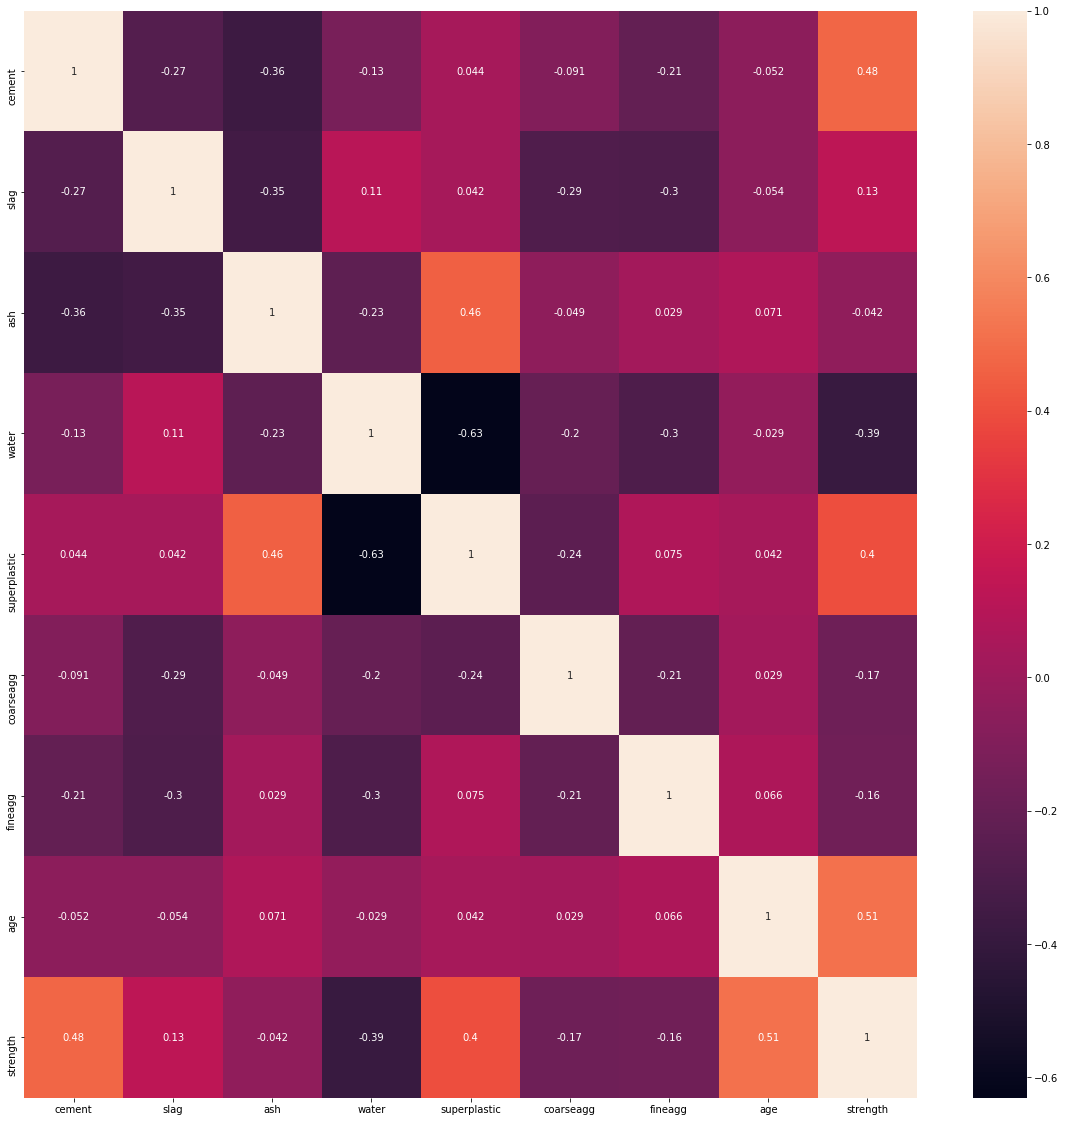

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr(), annot=True);

In [ ]:
df.corr()['strength'].sort_values()[:-1]

water          -0.385794
coarseagg      -0.165909
fineagg        -0.161633
ash            -0.042227
slag            0.129455
superplastic    0.398849
cement          0.476464
age             0.509746
Name: strength, dtype: float64

Gördüğümüz gibi, dayanım aşağıdakilerle güçlü pozitif korelasyona sahiptir:
    
    süperplastikleştirici
    çimento
    yaş  
    
ve aşağıdakilerle negatif korelasyona sahiptir:
    
    su

# 5. Modelleme

In [ ]:
X = df.drop('strength', axis=1)
y = df['strength']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelleri İçe Aktarma

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from catboost import CatBoostRegressor

## Temel Modeller ve Skorlar

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    model_rsme = {}
    model_r2 = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
        y_preds = model.predict(X_test)
        model_rsme[name] = np.sqrt(mean_squared_error(y_test,y_preds))
        model_r2[name] = r2_score(y_test,y_preds)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
    
    model_rsme = pd.DataFrame(model_rsme, index=['RSME']).transpose()
    model_rsme = model_rsme.sort_values('RSME')
    
    model_r2 = pd.DataFrame(model_r2, index=['R2']).transpose()
    model_r2 = model_r2.sort_values('R2')
        
    return model_scores,model_rsme, model_r2

In [ ]:
models = {'Ridge' : Ridge(),
         'Lasso': Lasso(),
         'ElasticNet': ElasticNet(),
         'KNeighborsRegressor': KNeighborsRegressor(),
         'SVR': SVR(),
         'DecisionTreeRegressor': DecisionTreeRegressor(),
         'RandomForestRegressor':RandomForestRegressor(),
         'GradientBoostingRegressor': GradientBoostingRegressor(),
         'AdaBoostRegressor': AdaBoostRegressor(),
        'XGBRegressor': XGBRegressor(objective='reg:squarederror'),
        'XGBRFRegressor': XGBRFRegressor(objective='reg:squarederror'),
          'CatBoostRegressor': CatBoostRegressor(verbose=0)
         }

In [ ]:
model_scores_baseline, model_rsme_baseline, model_r2_baseline = fit_and_score(models, X_train, X_test, y_train, y_test)

In [ ]:
model_scores_baseline

,Score
ElasticNet,0.663770
Lasso,0.752160
SVR,0.768157
AdaBoostRegressor,0.777528
KNeighborsRegressor,0.778866
Ridge,0.784653
XGBRFRegressor,0.877078
DecisionTreeRegressor,0.880194
GradientBoostingRegressor,0.928825
RandomForestRegressor,0.930410


In [ ]:
model_rsme_baseline.sort_values('RSME', ascending=False)

,RSME
ElasticNet,9.487489
Lasso,8.145512
SVR,7.878245
AdaBoostRegressor,7.717389
KNeighborsRegressor,7.694148
Ridge,7.592800
XGBRFRegressor,5.736516
DecisionTreeRegressor,5.663336
GradientBoostingRegressor,4.365128
RandomForestRegressor,4.316236


In [ ]:
model_r2_baseline

,R2
ElasticNet,0.663770
Lasso,0.752160
SVR,0.768157
AdaBoostRegressor,0.777528
KNeighborsRegressor,0.778866
Ridge,0.784653
XGBRFRegressor,0.877078
DecisionTreeRegressor,0.880194
GradientBoostingRegressor,0.928825
RandomForestRegressor,0.930410


In [ ]:
df['strength'].mean()

34.634299674267105

## CatBoost

In [ ]:
model = CatBoostRegressor(iterations=10000, verbose=0)
model.fit(X_train,y_train, eval_set=[(X_test,y_test)],early_stopping_rounds=50)

# 6. Model Değerlendirmesi

In [ ]:
y_preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)

In [ ]:
print(f'Ortalama Mutlak Hata: {mae}')
print(f'Ortalama Kare Hata: {mse}')
print(f'Ortalama Karekök Hata: {rmse}')
print(f'R2 Skoru: {r2}')

mean absolute error: 2.4040859975781492
Mean squared error: 10.980163201165693
Root Mean Squared Error: 3.3136329309634904
R2 Score: 0.9589849721206833


## Özellik Önemi

In [ ]:
feat_impt = pd.DataFrame(model.feature_importances_, index=X.columns)

In [ ]:
feat_impt

,0
cement,25.991313
slag,10.262451
ash,2.244700
water,13.283504
superplastic,7.193668
coarseagg,3.199526
fineagg,4.958880
age,32.865958


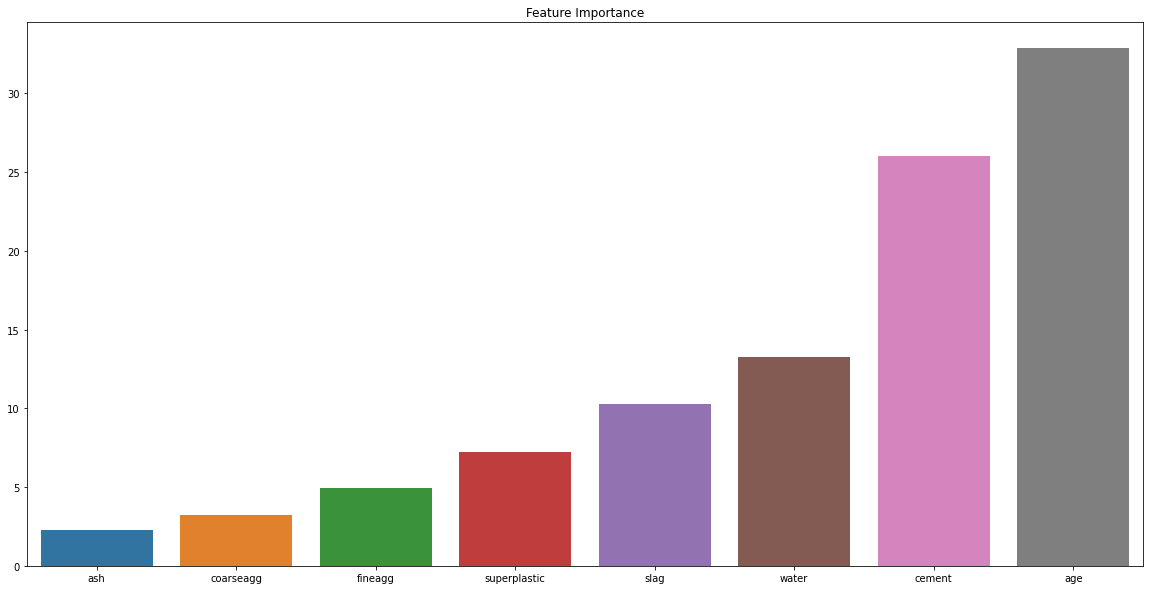

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Özellik Önemi')
sns.barplot(data= feat_impt.sort_values(0).T);

## Çapraz Doğrulama ile Değerlendirme

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def get_cv_score(model, X, y, cv=5):
    
    
    cv_r2 = cross_val_score(model,X,y,cv=cv,
                         scoring='r2')
    print(f'Çapraz Doğrulama R2 Skorları: {cv_r2}')
    print(f'Çapraz Doğrulama R2 Ortalama Skoru: {cv_r2.mean()}')
    
    cv_neg_mean_absolute_error = cross_val_score(model,X,y,cv=cv,
                         scoring='neg_mean_absolute_error')
    print(f'Çapraz Doğrulama Negatif OMA Skorları: {cv_neg_mean_absolute_error}')
    print(f'Çapraz Doğrulama Negatif OMA Ortalama Skoru: {cv_neg_mean_absolute_error.mean()}')
    
    cv_neg_mean_squared_error = cross_val_score(model,X,y,cv=cv,
                         scoring='neg_mean_squared_error')
    print(f'Çapraz Doğrulama Negatif OKH Skorları: {cv_neg_mean_squared_error}')
    print(f'Çapraz Doğrulama Negatif OKH Ortalama Skoru: {cv_neg_mean_squared_error.mean()}')
    
    cv_neg_root_mean_squared_error = cross_val_score(model,X,y,cv=cv,
                         scoring='neg_root_mean_squared_error')
    print(f'Çapraz Doğrulama Negatif OKKH Skorları: {cv_neg_root_mean_squared_error}')
    print(f'Çapraz Doğrulama Negatif OKKH Skoru: {cv_neg_root_mean_squared_error.mean()}')   
    
    cv_merics = pd.DataFrame({'R2': cv_r2.mean(),
                         'neg_mean_absolute_error': cv_neg_mean_absolute_error.mean(),
                         'neg_mean_squared_error': cv_neg_mean_squared_error.mean(),
                         'neg_root_mean_squared_error': cv_neg_root_mean_squared_error.mean()},index=[0])
    
    return cv_merics

In [ ]:
cv_model = CatBoostRegressor(iterations=4524,verbose=0)

In [ ]:
cv_merics = get_cv_score(cv_model, X_train, y_train, cv=5)

Cross Validaion R2 Scores: [0.94966318 0.95537163 0.92344146 0.8689164  0.88362228]
Cross Validation R2 Mean Score: 0.9162029895465246
Cross Validaion Neg MAE Scores: [-2.85439902 -2.44120233 -2.90928273 -3.21067838 -3.3249182 ]
Cross Validation Neg MAE Mean Score: -2.9480961323992103
Cross Validaion Neg MSE Scores: [-16.40626753 -11.8430223  -21.44964621 -30.69662969 -27.60617894]
Cross Validation Neg MSE Mean Score: -21.6003489357911
Cross Validaion Neg RMSE Scores: [-4.0504651  -3.44136925 -4.63137628 -5.54045392 -5.25415825]
Cross Validation Neg RMSE Score: -4.583564560431581


In [ ]:
cv_merics

,R2,neg_mean_absolute_error,neg_mean_squared_error,neg_root_mean_squared_error
0,0.916203,-2.948096,-21.600349,-4.583565
